In [3]:
import networkx as nx
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv("data/space/space_data.tsv", sep = "\t")
df.head(5)

,source,target,depth
0,space exploration,discovery and exploration of the solar system,1
1,space exploration,in-space propulsion technologies,1
2,space exploration,robotic spacecraft,1
3,space exploration,timeline of planetary exploration,1
4,space exploration,landings on other planets,1


In [6]:
G = nx.from_pandas_edgelist(df, "source", "target", edge_attr = True, create_using = nx.Graph())

In [7]:
len(G)

2088

In [8]:
def get_randomwalk(node, path_length):
    random_walk = [node]
    for i in range(path_length - 1):
        temp = list(G.neighbors(node))
        temp = list(set(temp) - set(random_walk))
        if len(temp) == 0:
            break
            
        random_node = random.choice(temp)
        random_walk.append(random_node)
        node = random_node
        
    return random_walk

In [9]:
get_randomwalk('space exploration', 10)

['space exploration',
 'sample return mission',
 'robotic exploration of the moon',
 'international lunar exploration working group',
 'exploration of the moon',
 'colonization of the moon',
 'lunar resources',
 'asteroid mining',
 'asteroid redirect mission',
 'asteroid-impact avoidance']

In [10]:
#get list of all nodes from the graph
all_nodes = list(G.nodes())

random_walks = []
for n in tqdm(all_nodes):
    for i in range(5):
        random_walks.append(get_randomwalk(n, 10))
        
len(random_walks)

100%|██████████| 2088/2088 [00:00<00:00, 4869.20it/s]


10440

In [12]:
from gensim.models import Word2Vec
model = Word2Vec(window = 4, sg = 1, hs = 0,
                negative = 10, alpha = 0.33, min_alpha = 0.0007,
                seed = 14)
model.build_vocab(random_walks, progress_per = 2)
model.train(random_walks, total_examples = model.corpus_count, epochs = 20, report_delay = 1)

(980913, 1010480)

In [13]:
model.similar_by_word('space tourism')

<ipython-input-13-a310658892c3>:1: DeprecationWarning: Call to deprecated `similar_by_word` (Method will be removed in 4.0.0, use self.wv.similar_by_word() instead).
  model.similar_by_word('space tourism')


[('valentina tereshkova', 0.7874040603637695),
 ('lunar outpost (nasa)', 0.786030113697052),
 ('glider pilot license', 0.7794921398162842),
 ('global security challenge', 0.7788718342781067),
 ('class m planet', 0.7681514024734497),
 ('robot rights', 0.7539568543434143),
 ('control engineering (magazine)', 0.7537608742713928),
 ('cities of the underworld', 0.7527996301651001),
 ('space station 3d', 0.7525389194488525),
 ('space research service', 0.7498314380645752)]

In [25]:
terms = ['lunar escape systems', 'soviet moonshot', 'soyuz 7k-l1',
        'moon landing', 'space food', 'food systems on space exploration missions',
        'meal, ready-to-eat', 'space law', 'metalaw', 'moon treaty', 'legal aspects of computing',
        'astronaut training', 'reduced-gravity aircraft',
        'space adaptation syndrome', 'micro-g environment']

In [26]:
def plot_nodes(word_list):
    X = model[word_list]
    pca = PCA(n_components = 2)
    result = pca.fit_transform(X)
    
    plt.figure(figsize = (12, 9))
    plt.scatter(result[:, 0], result[:, 1])
    for i, word in enumerate(word_list):
        plt.annotate(word, xy = (result[i, 0], result[i, 1]))
        
    plt.show()

<ipython-input-26-a4e614b851d1>:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  X = model[word_list]


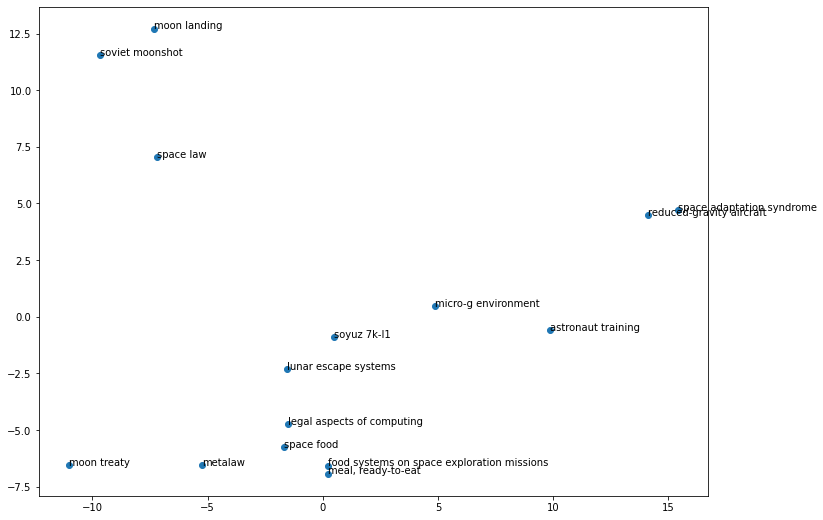

In [27]:
plot_nodes(terms)